Integral 1:
Monte Carlo: 0.573, Simpson's Rule: 0.555, Trapezoidal Rule: 0.555, Analytical: 0.555

Integral 2:
Monte Carlo: 7.899, Simpson's Rule: 7.955, Trapezoidal Rule: 7.955, Analytical: 7.955

Integral 3:
Monte Carlo: 3.544, Simpson's Rule: 3.628, Trapezoidal Rule: 3.628, Analytical: 3.628



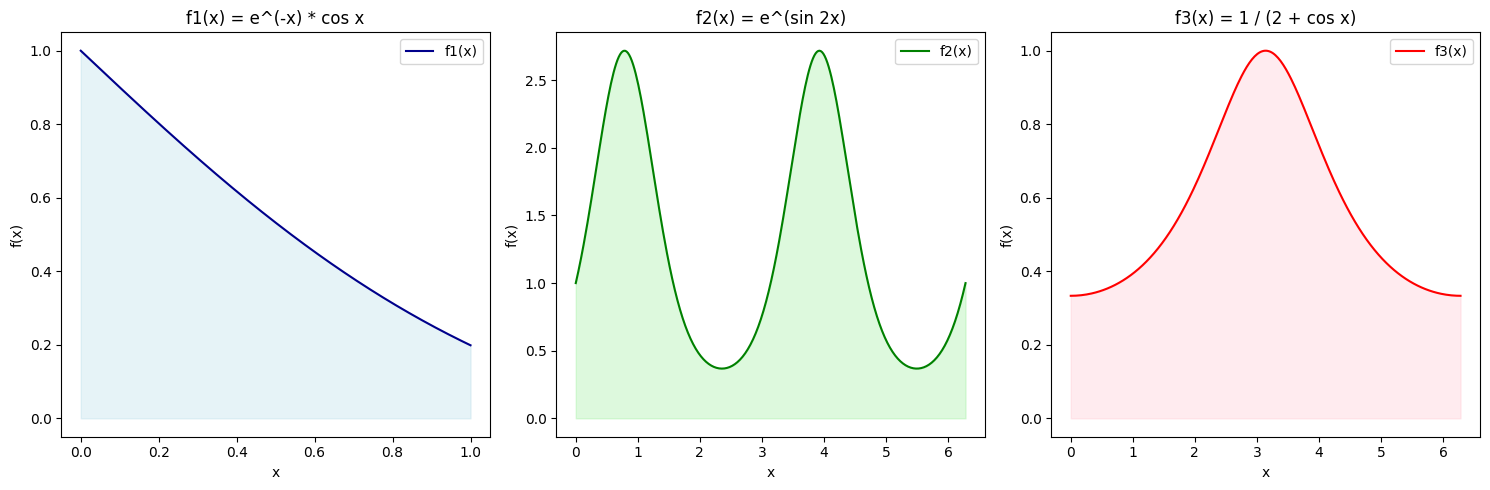

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Functions: a, b, c
def f1(x):
    return np.exp(-x) * np.cos(x)

def f2(x):
    return np.exp(np.sin(2 * x))

def f3(x):
    return 1 / (2 + np.cos(x))

# Monte Carlo
def monte_carlo(func, a, b, n):
    x = np.random.uniform(a, b, n)
    y = func(x)
    return (b - a) * np.mean(y)

# Simpson's rule:
def simpsons_rule(func, a, b, n):
    if n % 2 == 1:
        n += 1  
    x = np.linspace(a, b, n + 1)
    y = func(x)
    h = (b - a) / n
    return h / 3 * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

# Trapezoidal rule:
def trapezoidal_rule(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = func(x)
    h = (b - a) / n
    return h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

# Analytical integration:
def analytical_integration(func, a, b):
    result, _ = quad(func, a, b)
    return result

# Parameters
n_points = 1000
n_intervals = 100

# Integrals
a, b = 0, 1
mc1 = monte_carlo(f1, a, b, n_points)
simp1 = simpsons_rule(f1, a, b, n_intervals)
trap1 = trapezoidal_rule(f1, a, b, n_intervals)
anal1 = analytical_integration(f1, a, b)

c, d = 0, 2 * np.pi
mc2 = monte_carlo(f2, c, d, n_points)
simp2 = simpsons_rule(f2, c, d, n_intervals)
trap2 = trapezoidal_rule(f2, c, d, n_intervals)
anal2 = analytical_integration(f2, c, d)

mc3 = monte_carlo(f3, c, d, n_points)
simp3 = simpsons_rule(f3, c, d, n_intervals)
trap3 = trapezoidal_rule(f3, c, d, n_intervals)
anal3 = analytical_integration(f3, c, d)

# Show results
results = {
    "Integral 1": [mc1, simp1, trap1, anal1],
    "Integral 2": [mc2, simp2, trap2, anal2],
    "Integral 3": [mc3, simp3, trap3, anal3],
}

for key, value in results.items():
    print(f"{key}:\nMonte Carlo: {value[0]:.3f}, Simpson's Rule: {value[1]:.3f}, Trapezoidal Rule: {value[2]:.3f}, Analytical: {value[3]:.3f}\n")

# Plot functions
x1 = np.linspace(a, b, 300)
x2 = np.linspace(c, d, 300)
x3 = np.linspace(c, d, 300)

plt.figure(figsize=(15, 5))

# Graph 1
plt.subplot(1, 3, 1)
plt.plot(x1, f1(x1), label="f1(x)", color='darkblue')
plt.fill_between(x1, f1(x1), alpha=0.3, color='lightblue')
plt.title("f1(x) = e^(-x) * cos x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Graph 2
plt.subplot(1, 3, 2)
plt.plot(x2, f2(x2), label="f2(x)", color='green')
plt.fill_between(x2, f2(x2), alpha=0.3, color='lightgreen') 
plt.title("f2(x) = e^(sin 2x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Graph 3
plt.subplot(1, 3, 3)
plt.plot(x3, f3(x3), label="f3(x)", color='red')
plt.fill_between(x3, f3(x3), alpha=0.3, color='pink') 
plt.title("f3(x) = 1 / (2 + cos x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()

Monte Carlo: 12.206
Simpson's Rule: 340.251
Analytical: 13.019


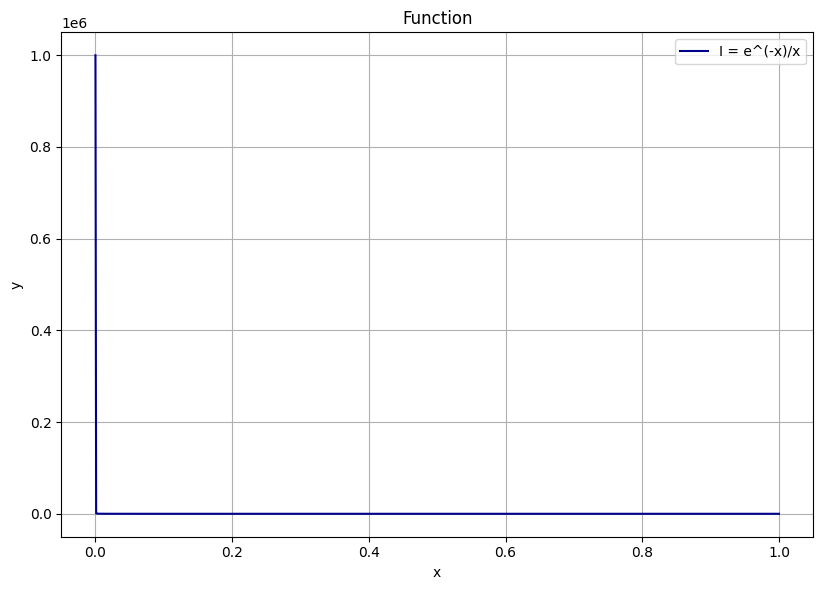

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo(f, a, b, n=100000):
    x = np.random.uniform(a, b, n)
    y = f(x)
    return (b - a) * np.mean(y)

def f(x):
    return np.exp(-x) / x

# Limits：
a = 1e-6
b = 1

x = np.linspace(a, b, 1000)
y = f(x)

# Simpson's rule:
simpson_result = simpsons_rule(f, a, b, 1000)

# Monte Carlo:
mc_result = monte_carlo(f, a, b)

# Analytical (using scipy.integrate.quad for high precision)
analytical_result = analytical_integration(f, a, b)

# Plot results
plt.figure(figsize=(16, 6))

# Plot function
plt.subplot(1, 2, 1)
plt.plot(x, y, linestyle='-',color='darkblue', label='I = e^(-x)/x')
plt.grid(True)
plt.title('Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()

# Print results
print(f"Monte Carlo: {mc_result:.3f}")
print(f"Simpson's Rule: {simpson_result:.3f}")
print(f"Analytical: {analytical_result:.3f}")